In [1]:
import converter as cv
from qiskit.circuit import ParameterVector, QuantumCircuit, Parameter
from qiskit import execute, Aer, IBMQ, QuantumRegister, ClassicalRegister, BasicAer
from qiskit.utils.quantum_instance import QuantumInstance
import pylab
import numpy as np
import converter as cv
import dill
from math import pi
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler


C:\Users\sergi\miniconda3\envs\pennylane_env\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [3]:
from qiskit.circuit import ParameterVector, QuantumCircuit, Parameter
from qiskit import execute, Aer, IBMQ, QuantumRegister, ClassicalRegister, BasicAer
from qiskit.utils.quantum_instance import QuantumInstance
import numpy as np
def coding_bits(b):
    c = [b[n:n+7] for n,i in enumerate(b) if n%7==0]
    c_p=[]
    coding_0=[]
    for i in range(len(c)):
        for j in c[i]:
            c_p.append(str(j))
    np.asarray(c_p)
    c = [c_p[n:n+7] for n,i in enumerate(c_p) if n%7==0]
    for i in c:
        coding_0.append(''.join(i))
    return coding_0

class CircuitConversor:

    def __init__(self, nqubits, nparameters):
        gates = {}
        for n, suffix in enumerate(['0000','0001','0010','0011','0100','0101','0110','0111','1000','1001','1010','1011','1101','1110','1111','1100']):
            angle = (np.pi /8)*(n+1)
            gates['000'+suffix] = (self.make_rx_(angle), 1.0)
            gates['001'+suffix] = (self.make_cx(), 2.0)
            gates['010'+suffix] = (self.make_id(), 0.0)
            gates['011'+suffix] = (self.make_rx(angle), 1.0)
            gates['100'+suffix] = (self.make_rz(angle), 1.0)
            gates['101'+suffix] = (self.make_ry_(angle), 1.0)
            gates['110'+suffix] = (self.make_rz_(angle), 1.0)
            gates['111'+suffix] = (self.make_ry(angle), 1.0)
        self.gates = gates
        self.nqubits = nqubits
        self.register = QuantumRegister(nqubits, 'q')
        self.nparameters = nparameters
        self.nqubits = nqubits
        self.x = ParameterVector('x', nparameters)

    def __call__(self, coding_0):
        print(coding_0)
        circuit = QuantumCircuit(self.register)
        k = 0
        cost = 0
        for ndx, z in enumerate(coding_0):
            qubit = ndx % self.nqubits
            target = (ndx + 1) % self.nqubits
            fn, weight = self.gates[z]
            k = fn(circuit, k, qubit, target)
            cost += weight
        for i in range(k, self.nparameters):
            circuit.rz(self.x[i]*0, self.register[0])
        return circuit, cost

    def make_id(self):
        def operation(circuit, k, qubit, target):
            return k
        return operation

    def make_H(self):
        def operation(circuit, k, qubit, target):
            circuit.h(self.register[qubit])
            return k
        return operation

    def make_cx(self):
        def operation(circuit, k, qubit, target):
            circuit.cx(self.register[qubit], self.register[target])
            return k
        return operation

    def make_rx(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_ry(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_rz(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation
    
    def make_rx_(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(angle,self.register[qubit])
            return k
        return operation

    def make_ry_(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(angle,self.register[qubit])
            return k
        return operation

    def make_rz_(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(angle, self.register[qubit])
            return k
        return operation
    

import os
import psutil

class Fitness:

    def __init__(self, nqubits, nparameters, X, y, quantum_instance):
        self.nqubits = nqubits
        self.nparameters = nparameters
        self.cc = CircuitConversor(nqubits, nparameters)
        self.instance = quantum_instance
        self.X = X
        self.y = y

    def __call__(self, POP):
        try:
            return self.fitness(POP)
        except Exception as e:
            print(f'Exception happened during fitness():\n  {e}')
            process = psutil.Process(os.getpid())
            print(f'  RUSAGE_SELF: {process.memory_info()}')
        return 1000, 100000.0

    def fitness(self, POP):
        print('Invoked fitness')
        #Convertimos el individuo en el fenotipo (ansatz)
        fm, puertas = self.cc(coding_bits(POP))


64
['0101010', '0001000', '1011010', '1011010', '1111100', '0110000', '0100010', '0100001', '1100111', '0010111', '0100110', '0110011', '0100101', '1000011', '1010010', '1101010', '1010110', '0001011', '1001101', '0111010', '1101100', '0000110', '1001010', '1000011', '1111001', '0000111', '0010110', '1011110', '1101010', '0110101', '1110101', '1000110', '1110011', '1100000', '0010010', '1001011', '1111001', '0100011', '1001010', '1101110', '1011100', '0110100', '1101111', '0110100', '0101001', '1000010', '0000110', '0010111', '1100010', '1101000', '0110000', '0110011', '0101101', '1011011', '1001001', '0100111', '1100101', '0111111', '1001011', '1100010', '1100010', '0101001', '1101000', '1010101', '0010100', '1001101', '1101000']


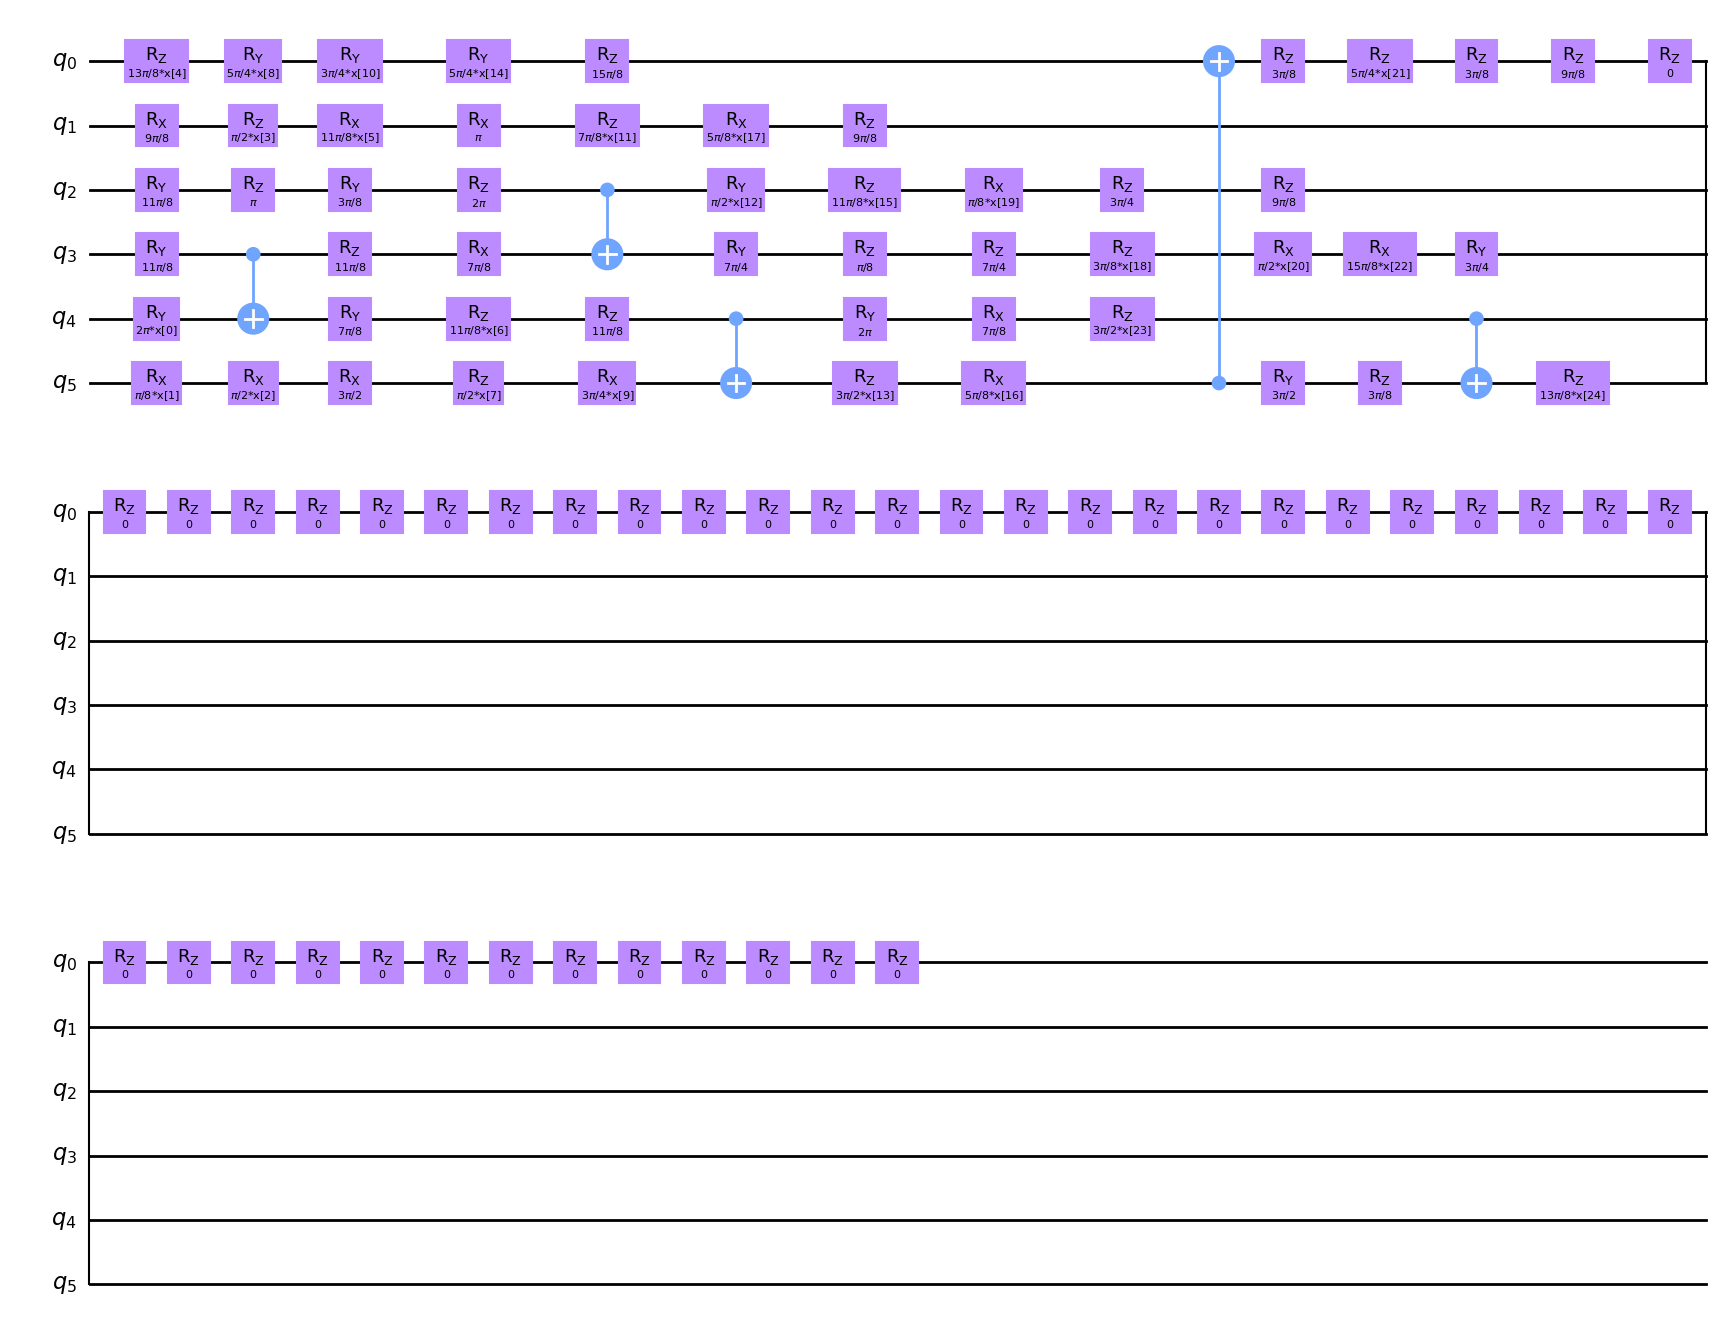

In [4]:
import pickle
path = r'C:\Users\sergi\Desktop\AUTOQML_CODE\COVID\ConvAE_Aproximation2\ind'
model = r'\tuples_0.8513513513513513_19.260256878500122.pkl'
with open(path+model, 'rb') as f:
    param,pop= pickle.load(f)
    
print(param)
cc = CircuitConversor(nqubits=6, nparameters=param)
fm, puertas = cc(coding_bits(pop))
fig = fm.draw(output='mpl')
fig.savefig('Circuit.pdf')
fm.draw(output='mpl')